In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tqdm import tqdm

# Load graphs

In [3]:
# Function to visualize an adjacency matrix
def plot_adjacency_matrix(adj_matrix, title="Adjacency Matrix"):
    plt.figure(figsize=(6,6))
    plt.imshow(adj_matrix, cmap='gray_r', interpolation='none')
    plt.title(title)
    plt.colorbar(label="Edge Weight")
    plt.show()

# Check if A is symmetric (difference between A and A.T is zero) without using numpy's isclose function
def is_symmetric(A):
    return np.all(A - A.T == 0)

def erdos_renyi(N,p,symmetric=True):
    A = np.random.rand(N,N)
    A = A<p
    if symmetric:
        A = np.triu(A,1)
        A = A + A.T
    return A



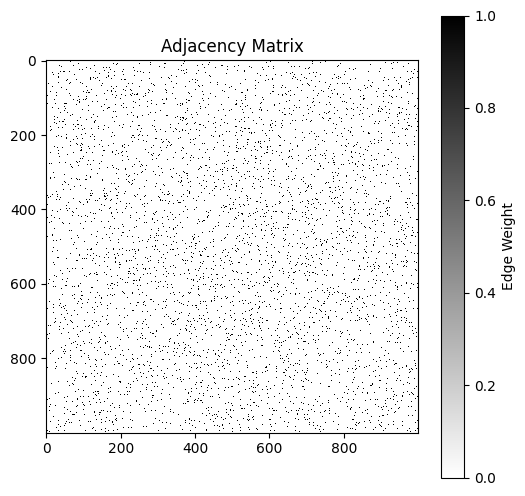

Graph with 1000 nodes and 16313 edges
Density: 0.032658658658658656


In [4]:
A_ER=erdos_renyi(1000,0.033,symmetric=True)
plot_adjacency_matrix(A_ER)
G_ER=nx.Graph(A_ER)
print(G_ER)
print('Density:',nx.density(G_ER))

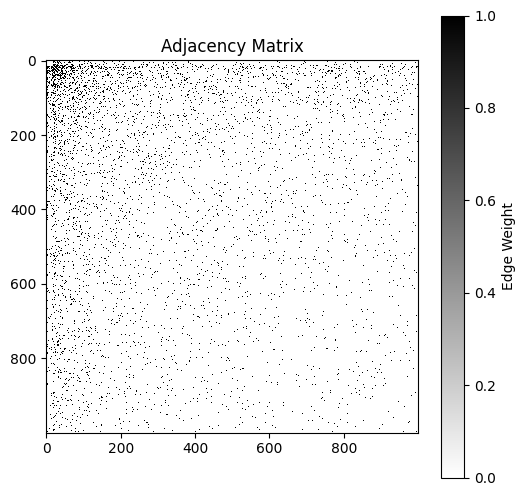

Graph with 1000 nodes and 16711 edges
Density: 0.03345545545545545


In [5]:
G_BA= nx.barabasi_albert_graph(1000, 17)
A_BA=nx.to_numpy_array(G_BA)
plot_adjacency_matrix(A_BA)
print(G_BA)
print('Density:',nx.density(G_BA))

# Avalanche process
We are going to simulate a system where each node as a capacity proportional to its degree. We will simulate the sequential removal of nodes, with redistribution of the energy to its first-neighbours.

- Remove the chosen node.
- Redistribute energy to its neighbours.
- Check if some of them fail (energy>capacity).
- Keep track of how many node fail in this avalanche.

In [77]:
G = G_BA
print(G)

# Assign capacities to nodes
# Here, capacity is 1.5 × degree
capacity = {node: 1.5 * G.degree[node] for node in G.nodes()}
nx.set_node_attributes(G, capacity, "capacity")

Graph with 1000 nodes and 16711 edges


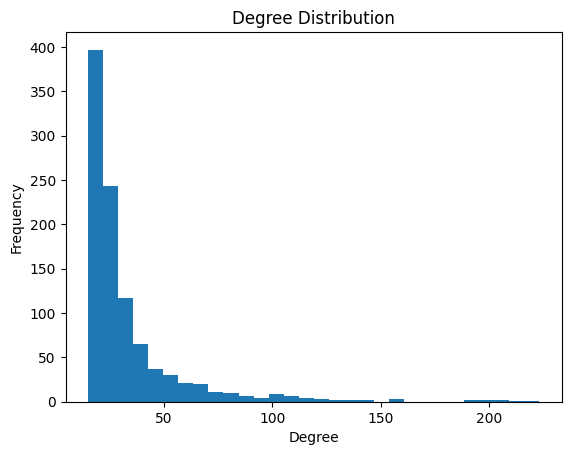

33.422


In [78]:
# Histogram of degrees
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
print(np.mean(degree_sequence))

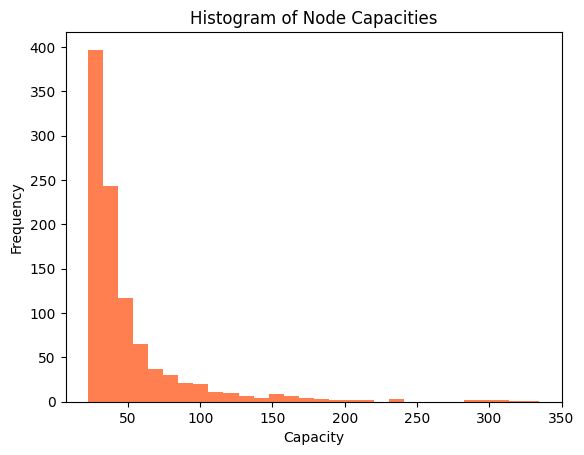

50.133


In [79]:
# Histogram of node capacities
plt.hist(list(capacity.values()), bins=30, color='coral')
plt.title("Histogram of Node Capacities")
plt.xlabel("Capacity")
plt.ylabel("Frequency")
plt.show()
print(np.mean(list(capacity.values())))

In [80]:
def simulate_avalanche(G, start_node, initial_energy=1000):
    """
    Remove start_node and redistribute its energy.
    Nodes that exceed their capacity fail and propagate recursively.
    Returns the list of failed nodes (cascade).
    """
    failed = []
    energy = {node: 0 for node in G.nodes()}
    
    # Initialize with one failed node
    to_fail = [start_node]
    energy[start_node] = initial_energy  # give initial energy
    
    while to_fail:
        node = to_fail.pop()
        if node in failed:
            continue
        failed.append(node)
        
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        
        # Distribute node's energy equally to neighbors
        distributed_energy = energy[node] / len(neighbors)
        for neighbor in neighbors:
            if neighbor in failed:
                continue
            energy[neighbor] += distributed_energy
            if energy[neighbor] > G.nodes[neighbor]['capacity']:
                to_fail.append(neighbor)
    
    return failed


In [82]:
# Get nodes with highest degree
degree_dict = dict(G.degree())
sorted_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)
# Select the top 10 nodes
print(sorted_nodes[:10])

[0, 23, 21, 19, 18, 24, 20, 22, 25, 26]


In [83]:
start_node = 0
# neighbors capacity
neighbors = list(G.neighbors(start_node))
print('Neighbors:',len(neighbors))
print('Neighbors capacity:',[G.nodes[n]['capacity'] for n in neighbors])
# total capacity
total_capacity = sum(G.nodes[n]['capacity'] for n in neighbors)
print('Total capacity:',total_capacity)

Neighbors: 223
Neighbors capacity: [22.5, 172.5, 172.5, 211.5, 52.5, 90.0, 91.5, 118.5, 102.0, 102.0, 84.0, 52.5, 156.0, 154.5, 207.0, 115.5, 147.0, 300.0, 306.0, 289.5, 309.0, 285.0, 315.0, 298.5, 238.5, 232.5, 231.0, 154.5, 165.0, 169.5, 184.5, 166.5, 186.0, 145.5, 130.5, 201.0, 150.0, 133.5, 162.0, 129.0, 160.5, 166.5, 162.0, 157.5, 214.5, 147.0, 103.5, 115.5, 198.0, 150.0, 102.0, 76.5, 100.5, 102.0, 81.0, 91.5, 82.5, 70.5, 91.5, 97.5, 121.5, 60.0, 88.5, 93.0, 84.0, 69.0, 79.5, 93.0, 87.0, 100.5, 105.0, 84.0, 58.5, 78.0, 69.0, 85.5, 78.0, 67.5, 58.5, 72.0, 85.5, 81.0, 64.5, 55.5, 75.0, 72.0, 105.0, 64.5, 58.5, 84.0, 60.0, 60.0, 63.0, 73.5, 55.5, 55.5, 48.0, 51.0, 69.0, 48.0, 69.0, 46.5, 54.0, 64.5, 42.0, 54.0, 49.5, 55.5, 46.5, 46.5, 52.5, 49.5, 57.0, 42.0, 46.5, 37.5, 45.0, 60.0, 43.5, 63.0, 46.5, 36.0, 40.5, 45.0, 45.0, 45.0, 45.0, 42.0, 40.5, 45.0, 37.5, 39.0, 36.0, 58.5, 43.5, 45.0, 43.5, 42.0, 39.0, 36.0, 42.0, 43.5, 36.0, 39.0, 39.0, 45.0, 36.0, 36.0, 43.5, 34.5, 46.5, 30.0, 3

In [89]:
simulate_avalanche(G, start_node=0, initial_energy=8000)

[0,
 996,
 995,
 798,
 789,
 461,
 959,
 628,
 790,
 767,
 993,
 863,
 843,
 990,
 986,
 698,
 859,
 458,
 787,
 662,
 728,
 511,
 943,
 397,
 561,
 464,
 644,
 407,
 366,
 844,
 611,
 978,
 946,
 500,
 541,
 976,
 912,
 431,
 873,
 505,
 1,
 968,
 815,
 957,
 917,
 660,
 888,
 868,
 606,
 861,
 845,
 794,
 749,
 740,
 620,
 709,
 697,
 693,
 692,
 682,
 667,
 664,
 396,
 640,
 634,
 630,
 617,
 536,
 333,
 578,
 565,
 562,
 454,
 445]

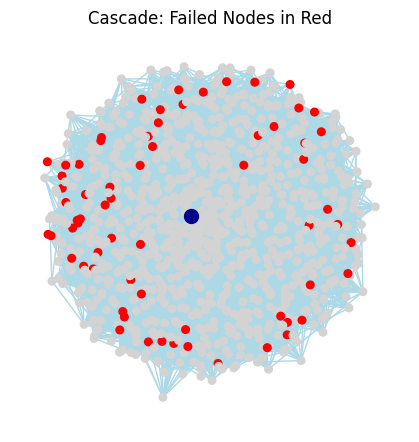

In [90]:
def plot_failed_nodes(G, failed):
    pos = nx.spring_layout(G, seed=42)
    node_colors = ["red" if node in failed else "lightgray" for node in G.nodes()]
    
    plt.figure(figsize=(4, 4))
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=30, edge_color="lightblue")
    # draw first node in dark blue
    nx.draw_networkx_nodes(G, pos, nodelist=[failed[0]], node_color="darkblue", node_size=100)
    plt.title("Cascade: Failed Nodes in Red")
    plt.show()


failed = simulate_avalanche(G, 20, 7000)
plot_failed_nodes(G, failed)

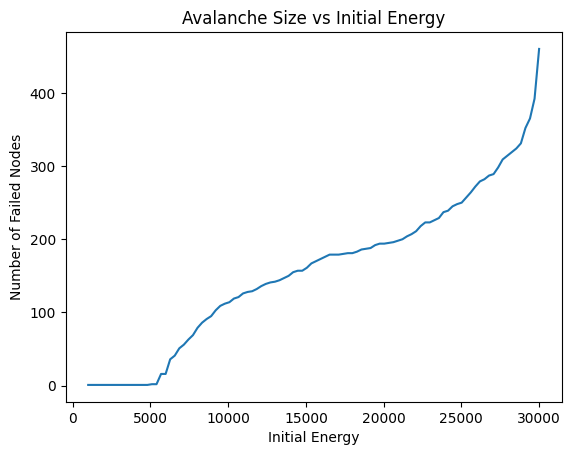

Neighbors: 223


In [93]:
start_node = 0#random.choice(list(G.nodes()))
# Trye different initial energy values
initial_energy_values = np.linspace(1000, 30000, 100)
failed_nodes = []
for initial_energy in initial_energy_values:
    failed = simulate_avalanche(G, start_node, initial_energy)
    failed_nodes.append(len(failed))

plt.plot(initial_energy_values, failed_nodes)
plt.title("Avalanche Size vs Initial Energy")
plt.xlabel("Initial Energy")
plt.ylabel("Number of Failed Nodes")
plt.show()
# numbers of neighbors of the start node
neighbors = list(G.neighbors(start_node))
print('Neighbors:',len(neighbors))

100%|██████████| 1000/1000 [00:00<00:00, 2253.36it/s]


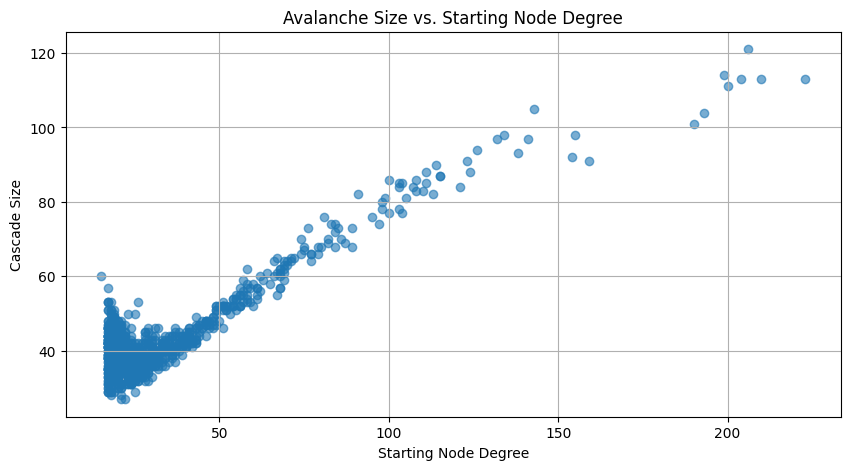

In [ ]:
# Try removing different nodes and see how big the cascade is
num_trials = 1000
cascade_sizes = []
start_node_degrees = []
trigger_nodes = random.sample(list(G.nodes), num_trials)

for node in tqdm(trigger_nodes):
    failed_nodes = simulate_avalanche(G, node, 10000) # try with very high energy 10000
    cascade_sizes.append(len(failed_nodes))
    start_node_degrees.append(G.degree(node))

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(start_node_degrees, cascade_sizes, alpha=0.6)
plt.xlabel("Starting Node Degree")
plt.ylabel("Cascade Size")
plt.title("Avalanche Size vs. Starting Node Degree")
plt.grid(True)
plt.show()


# SIR epidemiological model
Simulate disease spreading with an infection probability of $\beta$ and an infection duration of $1/ \mu$ days. 

- S: susceptible (can be infected)
- I: infected (can infect)
- R: recovered (cannot be infected because of previous exposure)

In [31]:
G = G_ER

In [32]:
def run_SIR(G, beta=0.1, mu=0.2, initial_infected=None, max_steps=100):
    states = {node: "S" for node in G.nodes()}
    if initial_infected is None:
        initial_infected = random.choice(list(G.nodes()))
    states[initial_infected] = "I"

    S, I, R = [], [], []
    infection_size= 1

    for t in range(max_steps):
        new_states = states.copy()

        for node in G.nodes():
            if states[node] == "I":
                # Try to infect neighbors
                for neighbor in G.neighbors(node):
                    if states[neighbor] == "S" and random.random() < beta:
                        new_states[neighbor] = "I"
                        infection_size += 1
                # Recovery (approximately)
                if random.random() < mu:
                    new_states[node] = "R"

        states = new_states

        # Record stats
        values = list(states.values())
        S.append(values.count("S"))
        I.append(values.count("I"))
        R.append(values.count("R"))

        # Stop if no infected remain
        if I[-1] == 0:
            break

    return S, I, R, infection_size


$R_0$ is defined as the number of secundary infections for a single infected invidual in a completely susceptible population. In a deterministic SIR model, it can be computed as $\alpha/\mu$ with 
- $\alpha = \beta \cdot k$ (transmission probability times daily number of contacts)
- $\mu=1/$ infection duration 

Here we compute the daily number of contacts as the average connectivity degree.

In [39]:
# R0
def calculate_R0(G, beta, mu):
    """
    Calculate the basic reproduction number R0.
    R0 = beta / mu * k
    where k is the average degree of the network.
    """
    avg_degree = np.mean([d for n, d in G.degree()])
    return (beta / mu) * avg_degree

# Example usage
beta = 0.013
mu = 0.2
R0 = calculate_R0(G, beta, mu)
print(f"R0: {R0:.2f}")

R0: 2.12


Infection size: 808


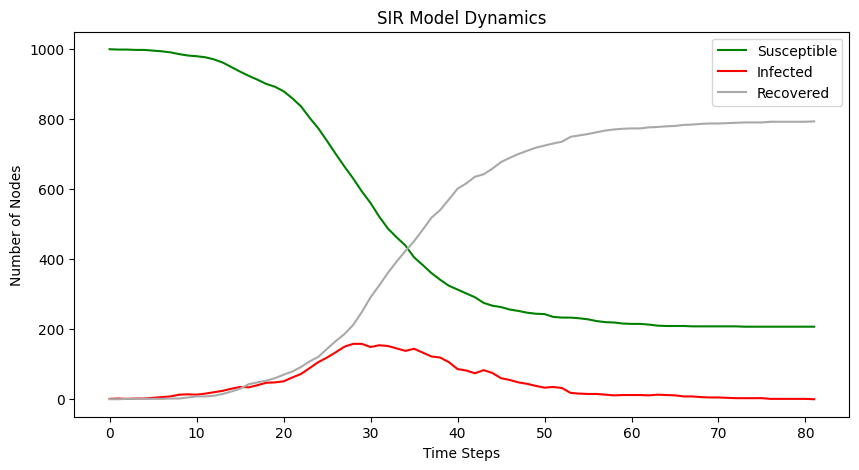

In [44]:

S, I, R, inf_size = run_SIR(G, beta=beta, mu=mu, initial_infected=10, max_steps=100)
plt.figure(figsize=(10, 5))
plt.plot(S, label="Susceptible", color="green")
plt.plot(I, label="Infected", color="red")
plt.plot(R, label="Recovered", color="darkgrey")
plt.title("SIR Model Dynamics")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.legend()
print('Infection size:',inf_size)

100%|██████████| 500/500 [00:02<00:00, 200.05it/s]


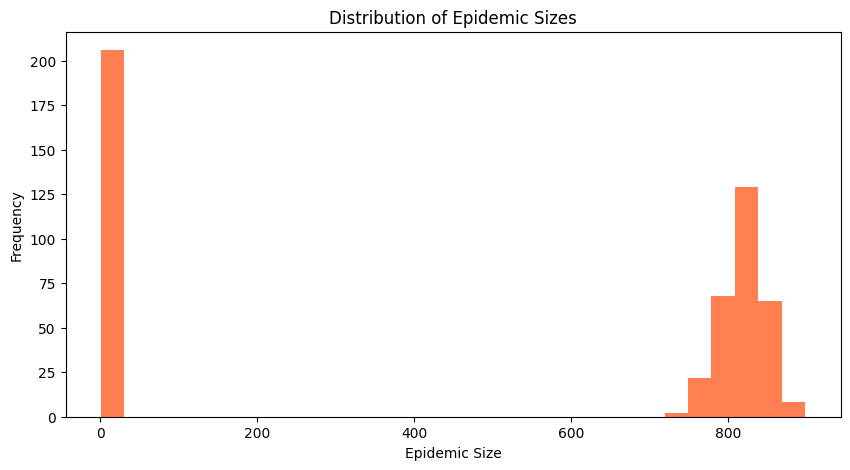

In [45]:
# Compute the total size of the epidemic starting from different initial infected nodes
num_trials = 500
infection_sizes = []
initial_infected_nodes = random.sample(list(G.nodes), num_trials)
for node in tqdm(initial_infected_nodes):
    S, I, R, inf_size = run_SIR(G, beta=beta, mu=mu, initial_infected=node, max_steps=100)
    infection_sizes.append(inf_size)
plt.figure(figsize=(10, 5))
plt.hist(infection_sizes, bins=30, color='coral')
plt.title("Distribution of Epidemic Sizes")
plt.xlabel("Epidemic Size")
plt.ylabel("Frequency")
plt.show()

In [46]:
pd.Series(infection_sizes)[pd.Series(infection_sizes)>400].describe()

count    294.000000
mean     819.557823
std       27.658110
min      724.000000
25%      802.250000
50%      820.000000
75%      838.000000
max      898.000000
dtype: float64

In [56]:
G= G_ER

100%|██████████| 500/500 [00:08<00:00, 56.02it/s]


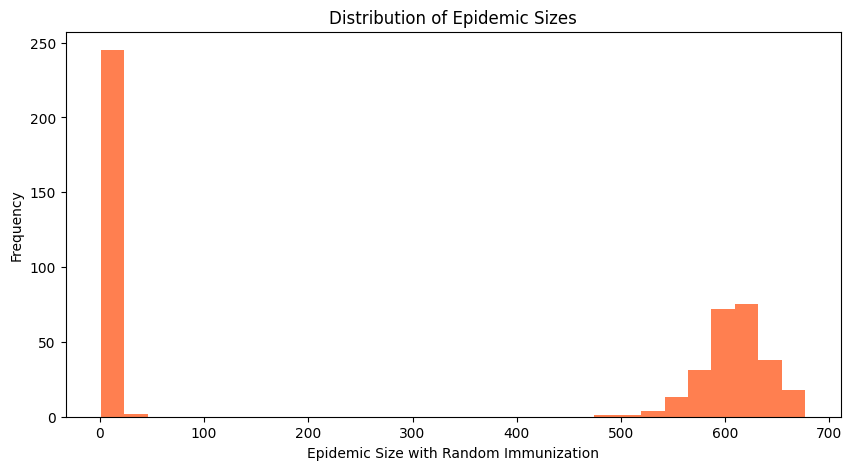

In [57]:
def immunize_random(G, fraction=0.1):
    G = G.copy()
    to_remove = random.sample(list(G.nodes()), int(fraction * len(G)))
    G.remove_nodes_from(to_remove)
    return G

# Compute the total size of the epidemic starting from different initial infected nodes
num_trials = 500
infection_sizes = []
for i in tqdm(range(num_trials)):
    # Immunize a fraction of the nodes
    G_immunized = immunize_random(G, fraction=0.2)
    # Choose a random node to infect
    node = random.choice(list(G_immunized.nodes()))
    S, I, R, inf_size = run_SIR(G_immunized, beta=0.015, mu=0.2, initial_infected=node, max_steps=100)
    infection_sizes.append(inf_size)
plt.figure(figsize=(10, 5))
plt.hist(infection_sizes, bins=30, color='coral')
plt.title("Distribution of Epidemic Sizes")
plt.xlabel("Epidemic Size with Random Immunization")
plt.ylabel("Frequency")
plt.show()

In [58]:
pd.Series(infection_sizes)[pd.Series(infection_sizes)>400].describe()

count    253.000000
mean     608.383399
std       31.110518
min      481.000000
25%      591.000000
50%      611.000000
75%      629.000000
max      677.000000
dtype: float64

100%|██████████| 500/500 [00:09<00:00, 53.53it/s]


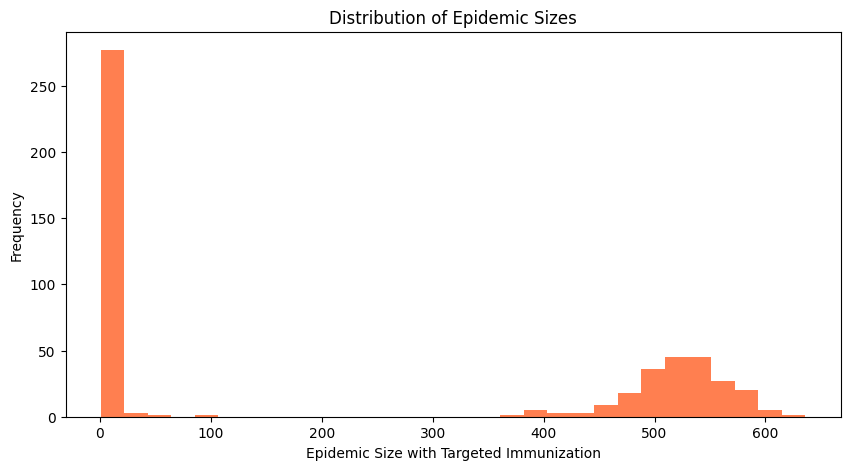

In [59]:
def immunize_targeted(G, fraction=0.1):
    G = G.copy()
    degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)
    to_remove = [node for node, _ in degrees[:int(fraction * len(G))]]
    G.remove_nodes_from(to_remove)
    return G

# Compute the total size of the epidemic starting from different initial infected nodes
num_trials = 500
infection_sizes = []
for i in tqdm(range(num_trials)):
    # Immunize a fraction of the nodes
    G_immunized = immunize_targeted(G, fraction=0.2)
    # Choose a random node to infect
    node = random.choice(list(G_immunized.nodes()))
    S, I, R, inf_size = run_SIR(G_immunized, beta=0.015, mu=0.2, initial_infected=node, max_steps=100)
    infection_sizes.append(inf_size)
plt.figure(figsize=(10, 5))
plt.hist(infection_sizes, bins=30, color='coral')
plt.title("Distribution of Epidemic Sizes")
plt.xlabel("Epidemic Size with Targeted Immunization")
plt.ylabel("Frequency")
plt.show()